<a href="https://colab.research.google.com/github/firmnsyah/Data-Mining/blob/main/DataMining_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [308]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [309]:
data = []

for i in range (1, 100) :
    url = f"https://www.scrapethissite.com/pages/forms/?page_num={i}"
    response = requests.get(url)
    response = response.content
    UserAgent = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html_text = urlopen(UserAgent)
    soup = BeautifulSoup(html_text, 'html.parser')

    tabel = soup.findAll("table", {"class" : "table"})[0]

    rows = tabel.findAll("tr")[1:]
    for row in rows:
        cols = row.findAll("td")
        row_data = [col.text.strip() for col in cols]
        data.append(row_data)

In [310]:
    header_list = []
    headers = tabel.findAll("th")
    for header in headers:
        header_list.append(header.text.strip())

In [312]:
df = pd.DataFrame(data, columns=header_list)

df.to_csv('ScrapeHockey.csv', index=False)

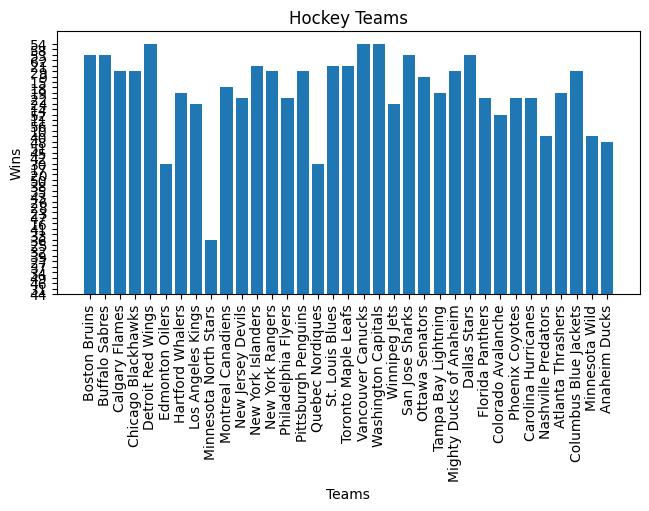

In [307]:
x = np.array(df['Team Name'])
plt.xticks (rotation = 'vertical')
y = np.array(df['Wins'])
plt.bar(x, y)
plt.tight_layout()
plt.title('Hockey Teams')
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.show()